<a href="https://colab.research.google.com/github/sukhmani1303/AIML-A2Z/blob/main/supervised-ml/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here, we focus on continuous values like age, sales, or any number-like quantity.
**We find the best-fit line which minimises all distances from any other point**
<br>
<br>

As we talk about lines... in linear-regression,

we use y=mx+c
where y is the label we want to predict.
m will be slope of the best-fit line
x is a parameter & c is a coefficient.




---



We aim to minimise the distance or **error** which is ***(predicted y)- (actual y)***


~ (mx + c) - (y) -> will also give negative values

we are intrested in abs values so we use **L1 norm**.

<br>

**Or**

<br>

 use euclidean distance which gives us the length (of each line) between actual outcome & the our prediction; which is the *L2 norm*
 
<br>

**Or**

<br>

We can also use the mean squared error cost function; squared error for every value div by total values

<br>

**Best Line - minimise the MSE (mean quared error) & minimise the distance.**



---

<br>

**R2 metric components**

*   *Sum of squared error (sse)*

  <sub>i=1</sub>∑<sup>ᵐ</sup>( yᵦ ( x ⁱ )  -  y ⁱ<sub>obs</sub> )<sup>2<sup>

  Measures the dist between truth & our predictions
  Its the unexplained variation from our model

  <br>


*   *Total sum of squares (tss)*

  <sub>i=1</sub>∑<sup>ᵐ</sup>( y̅<sub>obs</sub> - y ⁱ<sub>obs</sub> )<sup>2<sup>

  measures the dist between the truth & the avg values of truth
  Its the total variation
<br>

\begin{align}\text{R2 metric = } 1 - \frac{ sse }{ tee }\end{align}
<br>

  closer it is to 1, better our model justified its variance


---






In [1]:
# importing the model
from sklearn.linear_model import LinearRegression

In [2]:
# creating an instance
lr = LinearRegression()

In [ ]:
# training the model
lr = lr.fit(x_train, y_train)
y_predictions = lr.predict(y_test)

# **Applying Linear Regression on Boston Housing**


---


## **Checkout the Data**



In [74]:
# imp imports 
import numpy as np
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
%matplotlib inline
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [75]:
# loading the boston data to dataframe
data_url = "/content/sample_data/BostonHousing.csv"
boston_data = pd.read_csv(data_url)

In [76]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### **Normalisation**



---



Linear regression requires the data to have **normalised errors** but normalised outcome also helps.

<Axes: >

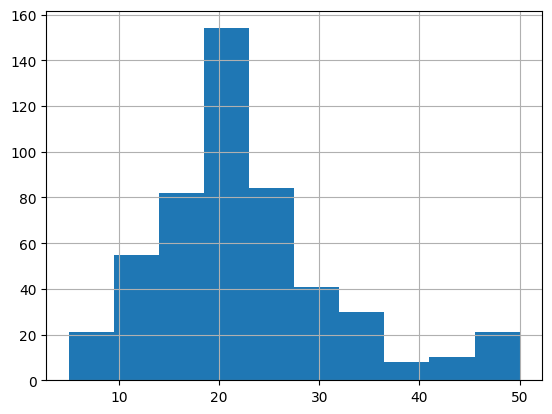

In [77]:
# visually checking for normalisaition :
boston_data.MEDV.hist()

In [78]:
# statistically checking for normalised data
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
# this produces "pvalue"
# if pvalue>0.05 -> normalised
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

For normalising the data, we perform the following 3 operations to check which performs the best & use that.


<Axes: >

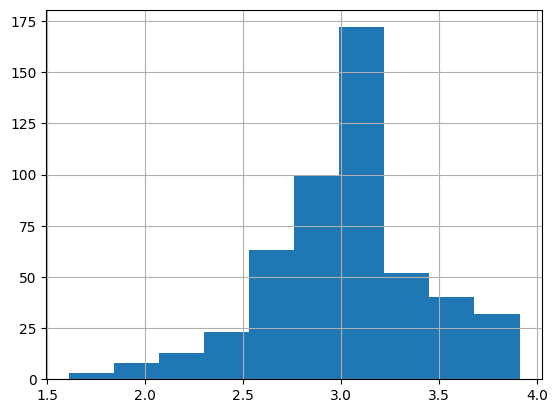

In [79]:
# Testing Log

# applying Log transformation to MEDV column :

logMedv = np.log(boston_data.MEDV)
logMedv.hist()

In [80]:
# check if data is normalised
normaltest(logMedv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

<Axes: >

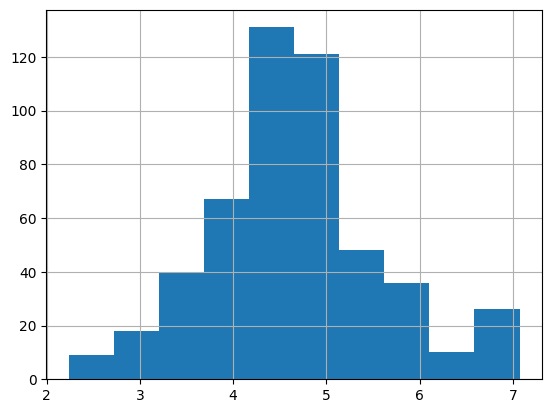

In [81]:
# Applying square root transformation

sqMedv = np.sqrt(boston_data.MEDV)
sqMedv.hist()

In [82]:
normaltest(sqMedv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

In [83]:
# applying BoxCox
# it's parameterized which tries to gets the distribution as close to normal as possible
from scipy.stats import boxcox

In [84]:
bc_result = boxcox(boston_data.MEDV)
bcMedv = bc_result[0]
normaltest(bcMedv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

As the **pvalue > 0.05 significantly**, we have normalised y values

## **Regression**


---




In [85]:
# imp imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [86]:
# initialize the linear regression object
lr = LinearRegression()

In [87]:
# reloading a cleaner version of boston housing 
# we already know which normalization techniques to apply (BoxCox)
data_url = "/content/sample_data/BostonHousing.csv"
boston_data = pd.read_csv(data_url)

In [88]:
label = "MEDV"
x = boston_data.drop(label, axis=1)
y = boston_data[label]
boston_data.shape

(506, 14)

In [89]:
# creating polynomial features
pf = PolynomialFeatures(degree = 2, include_bias = False)
# this creates a bias of its own

xpf = pf.fit_transform(x)

In [90]:
xpf.shape

(506, 104)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(xpf, y, test_size=0.3, 
                                                    random_state=72018)

In [103]:
# standard scaling
s = StandardScaler()
x_train_s = s.fit_transform(x_train)

In [104]:
# working on y values now: normalising 
bc_result2 = boxcox(y_train)
lam2 = bc_result2[1]
y_train_bc = bc_result2[0]

In [105]:
# finally fitting the lr model
lr.fit(x_train_s, y_train_bc)


LinearRegression()

In [106]:
# testing the model
x_test_s = s.transform(x_test) #scaling the test values
y_preds = lr.predict(x_test_s)

In [107]:
y_preds

array([4.43920316, 4.16230299, 4.14903773, 5.72770375, 5.70362608,
       6.59865445, 4.18842601, 4.77415222, 4.68282566, 4.85108878,
       6.82748198, 3.86236699, 5.0643167 , 4.31536775, 6.91107238,
       4.93538901, 4.64299542, 5.84297841, 5.24960436, 5.44823381,
       3.98464025, 4.88299011, 4.19919967, 3.59736013, 5.2309719 ,
       5.30478058, 5.85592444, 4.78820348, 4.78846728, 6.78622305,
       3.36299121, 4.39751616, 4.29381841, 6.9642437 , 4.49873355,
       5.51107039, 4.79092744, 5.61456675, 3.04824493, 5.35252088,
       3.34764987, 3.97589975, 5.14213658, 4.37539217, 5.07041151,
       6.31192606, 4.90476787, 5.25799412, 5.69133946, 4.21362253,
       5.2252357 , 5.49371642, 4.38650851, 3.95353734, 4.16951912,
       2.75465746, 4.06367514, 3.01030741, 4.5542641 , 4.8090537 ,
       5.74517281, 3.26233918, 3.5862807 , 6.17670312, 4.23677257,
       5.81985343, 3.41296646, 3.83284203, 4.98192021, 5.73417989,
       5.20709227, 5.2224684 , 5.25901124, 5.43662547, 3.82631

## **Inverse Transformations**


In [108]:
# to revert to original values to infer from the predictions 
# we apply inverse transformations

# as we applied BoxCox to y values, we will apply inverse BoxCox.

from scipy.special import inv_boxcox

In [111]:
# for this we need the lam from before
# lam is the lambda value it used for BoxCox, which can be used to revert back too.

y_pred_tran = inv_boxcox(y_preds,lam2)
y_pred_tran

array([18.18764633, 16.02118109, 15.92233954, 31.15151111, 30.86133663,
       43.04030376, 16.21712699, 21.08310581, 20.26274972, 21.79266177,
       46.64232124, 13.89242421, 23.84960218, 17.19412319, 48.01100168,
       22.58983096, 19.91231719, 32.56822865, 25.74822383, 27.90273951,
       14.73374523, 22.09189088, 16.2984427 , 12.18918737, 25.55251058,
       26.33416213, 32.7301985 , 21.21142645, 21.21384095, 45.97729223,
       10.81375159, 17.84867146, 17.02534292, 48.89661408, 18.67977065,
       28.6107062 , 21.23636788, 29.80503362,  9.14820041, 26.84888235,
       10.7278375 , 14.67241046, 24.63418765, 17.67064405, 23.91038755,
       38.81680567, 22.2978655 , 25.83670271, 30.71402051, 16.40776344,
       25.49247592, 28.41389642, 17.75993338, 14.51632917, 16.07513597,
        7.77007751, 15.29682794,  8.9608636 , 19.1474636 , 21.40287941,
       31.36327552, 10.25907883, 12.12145655, 36.93303167, 16.58434319,
       32.28035519, 11.09708157, 13.69461169, 23.03878612, 31.22

In [112]:
# for calculating r2 score :
r2_score(y_pred_tran, y_test)
# we pass our predictions & actual outcomes

0.8794001851338565